In [1]:
# imports
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load data 
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print('Data to learn: ', len(x_train),'\nData to test: ', len(x_test))

Data to learn:  60000 
Data to test:  10000


In [3]:
# scale the data
x_train, x_test = x_train/255, x_test/255

In [4]:
# create nn
ann = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28),),
    keras.layers.Dense(20, activation = keras.activations.relu),
    keras.layers.Dense(100, activation = keras.activations.sigmoid),
    keras.layers.Dense(10, activation = keras.activations.sigmoid),
])

In [5]:
ann.compile(optimizer = 'adam',
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'],
                 )

# training
ann.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 16s 7ms/step - loss: 0.4391 - accuracy: 0.8805
Epoch 2/3
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2165 - accuracy: 0.9344
Epoch 3/3
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1758 - accuracy: 0.9467


In [6]:
# evaluate the output of classic ann
ann.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.1704 - accuracy: 0.9482


[0.17039132118225098, 0.948199987411499]

In [7]:
y_pred = ann.predict(x_test)
y_pred = [np.argmax(e) for e in y_pred]

313/313 [==============================] - 1s 3ms/step


In [8]:
from sklearn.metrics import confusion_matrix, classification_report


# classification report
print('Classification report:\n', classification_report(y_test, y_pred))


Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.95      0.95      1032
           3       0.93      0.94      0.94      1010
           4       0.97      0.94      0.95       982
           5       0.93      0.93      0.93       892
           6       0.97      0.94      0.95       958
           7       0.96      0.93      0.95      1028
           8       0.92      0.94      0.93       974
           9       0.93      0.94      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [47]:
# creata data generators
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y

x_train_prep = x_train.reshape((len(x_train), 28,28,1))
train_gen = DataGenerator(x_train_prep, y_train, 32)

In [195]:
# create cnn
cnn = keras.Sequential([
    # cnn
    keras.layers.Conv2D(filters = 20, kernel_size = (3,3),input_shape = (28,28,1),activation = keras.activations.relu),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(filters = 50, kernel_size = (3,3), activation = keras.activations.relu),
    keras.layers.MaxPooling2D((2, 2)),

    # dense
    keras.layers.Flatten(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128, activation = keras.activations.relu),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation = keras.activations.relu),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10, activation = keras.activations.softmax),
])

In [197]:
cnn.compile(
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy'],
    )

In [198]:
cnn.fit(train_gen, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 32s 16ms/step - loss: 0.1869 - accuracy: 0.9426
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0645 - accuracy: 0.9814
Epoch 3/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0472 - accuracy: 0.9856
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0372 - accuracy: 0.9885
Epoch 5/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0310 - accuracy: 0.9905


In [ ]:
# prepare test data
x_test_prep = x_test.reshape((len(x_test), 28, 28, 1))
cnn.evaluate(x_test_prep, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0299 - accuracy: 0.9904


[0.029947219416499138, 0.9904000163078308]

In [ ]:
# get the predictions
y_pred_cnn = cnn.predict(x_test_prep)
y_pred_cnn = [np.argmax(e) for e in y_pred_cnn]

313/313 [==============================] - 2s 5ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# classification report
print('Classification report:\n', classification_report(y_test, y_pred_cnn))

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
#
# ----- Trying own digits -----
#

1/1 [==============================] - 0s 403ms/step


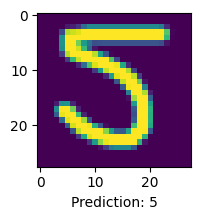

In [199]:
def predict_number(path):
    from PIL import Image

    img = Image.open(path)
    img = img.resize((28,28))

    #remove rgb channels
    img = np.asarray(img)

    avg = np.mean(img, axis = 2)
    img = avg.reshape((28,28,1))

    # normalize values
    img = img/255

    input_data = img.reshape((1, 28, 28, 1))
    prediction = cnn.predict(input_data,)

    prediction = np.argmax(prediction[0])

    plt.figure(figsize = (15,2))
    plt.xlabel(f'Prediction: {prediction}')
    plt.imshow(img)

predict_number('./img.png')

In [200]:
# saving
cnn.save('cnn.h5')